# Population Census Machine Learning (Simple Linear Regression)

### Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Import Dataset

In [2]:
df = pd.read_csv('total-personal-income-2018-census-csv.csv', encoding='cp1252')

In [3]:
df

Code Total_personal_income  \
0            11                  Loss   
1            12           Zero income   
2            13             $1–$5,000   
3            14        $5,001–$10,000   
4            15       $10,001–$15,000   
5            16       $15,001–$20,000   
6            17       $20,001–$25,000   
7            18       $25,001–$30,000   
8            19       $30,001–$35,000   
9            20       $35,001–$40,000   
10           21       $40,001–$50,000   
11           22       $50,001–$60,000   
12           23       $60,001–$70,000   
13           24      $70,001–$100,000   
14           25     $100,001–$150,000   
15           26      $150,001 or more   
16           99            Not stated   
17  TotalStated          Total stated   
18        Total                 Total   

    Census_usually_resident_population_count_aged_15_years_and_over  
0                                               20625                
1                                              257310                
2                                              210705                
3                                              177423                
4                                              262197                
5                                              375282                
6                                              306639                
7                                              210132                
8                                              186087                
9                                              212724                
10                                             364719                
11                                             309375                
12                                             234606                
13                                             361317                
14                                             176310                
15                                             110910                
16                                                  0                
17                                            3776355                
18                                            3776355

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Code                                                             19 non-null     object
 1   Total_personal_income                                            19 non-null     object
 2   Census_usually_resident_population_count_aged_15_years_and_over  19 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 584.0+ bytes


In [5]:
df.describe()

Census_usually_resident_population_count_aged_15_years_and_over
count                                       1.900000e+01              
mean                                        5.962669e+05              
std                                         1.125325e+06              
min                                         0.000000e+00              
25%                                         1.817550e+05              
50%                                         2.346060e+05              
75%                                         3.353460e+05              
max                                         3.776355e+06

In [6]:
df.dtypes

Code                                                               object
Total_personal_income                                              object
Census_usually_resident_population_count_aged_15_years_and_over     int64
dtype: object

In [7]:
df['Total_personal_income'] = df['Total_personal_income'].str.replace('$', '')

C:\Users\Saheed\AppData\Local\Temp\ipykernel_7424\254979054.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total_personal_income'] = df['Total_personal_income'].str.replace('$', '')


In [8]:
df

Code Total_personal_income  \
0            11                  Loss   
1            12           Zero income   
2            13               1–5,000   
3            14          5,001–10,000   
4            15         10,001–15,000   
5            16         15,001–20,000   
6            17         20,001–25,000   
7            18         25,001–30,000   
8            19         30,001–35,000   
9            20         35,001–40,000   
10           21         40,001–50,000   
11           22         50,001–60,000   
12           23         60,001–70,000   
13           24        70,001–100,000   
14           25       100,001–150,000   
15           26       150,001 or more   
16           99            Not stated   
17  TotalStated          Total stated   
18        Total                 Total   

    Census_usually_resident_population_count_aged_15_years_and_over  
0                                               20625                
1                                              257310                
2                                              210705                
3                                              177423                
4                                              262197                
5                                              375282                
6                                              306639                
7                                              210132                
8                                              186087                
9                                              212724                
10                                             364719                
11                                             309375                
12                                             234606                
13                                             361317                
14                                             176310                
15                                             110910                
16                                                  0                
17                                            3776355                
18                                            3776355

In [9]:
df['Total_personal_income'] = df['Total_personal_income'].str.replace(' or more', '')

In [10]:
df

Code Total_personal_income  \
0            11                  Loss   
1            12           Zero income   
2            13               1–5,000   
3            14          5,001–10,000   
4            15         10,001–15,000   
5            16         15,001–20,000   
6            17         20,001–25,000   
7            18         25,001–30,000   
8            19         30,001–35,000   
9            20         35,001–40,000   
10           21         40,001–50,000   
11           22         50,001–60,000   
12           23         60,001–70,000   
13           24        70,001–100,000   
14           25       100,001–150,000   
15           26               150,001   
16           99            Not stated   
17  TotalStated          Total stated   
18        Total                 Total   

    Census_usually_resident_population_count_aged_15_years_and_over  
0                                               20625                
1                                              257310                
2                                              210705                
3                                              177423                
4                                              262197                
5                                              375282                
6                                              306639                
7                                              210132                
8                                              186087                
9                                              212724                
10                                             364719                
11                                             309375                
12                                             234606                
13                                             361317                
14                                             176310                
15                                             110910                
16                                                  0                
17                                            3776355                
18                                            3776355

In [11]:
df.drop([0, 1, 16, 17, 18], axis = 0, inplace=True)

In [12]:
df

Code Total_personal_income  \
2    13               1–5,000   
3    14          5,001–10,000   
4    15         10,001–15,000   
5    16         15,001–20,000   
6    17         20,001–25,000   
7    18         25,001–30,000   
8    19         30,001–35,000   
9    20         35,001–40,000   
10   21         40,001–50,000   
11   22         50,001–60,000   
12   23         60,001–70,000   
13   24        70,001–100,000   
14   25       100,001–150,000   
15   26               150,001   

    Census_usually_resident_population_count_aged_15_years_and_over  
2                                              210705                
3                                              177423                
4                                              262197                
5                                              375282                
6                                              306639                
7                                              210132                
8                                              186087                
9                                              212724                
10                                             364719                
11                                             309375                
12                                             234606                
13                                             361317                
14                                             176310                
15                                             110910

In [13]:
df['Total_personal_income'] = df['Total_personal_income'].str.replace(',', '')

In [14]:
df

Code Total_personal_income  \
2    13                1–5000   
3    14            5001–10000   
4    15           10001–15000   
5    16           15001–20000   
6    17           20001–25000   
7    18           25001–30000   
8    19           30001–35000   
9    20           35001–40000   
10   21           40001–50000   
11   22           50001–60000   
12   23           60001–70000   
13   24          70001–100000   
14   25         100001–150000   
15   26                150001   

    Census_usually_resident_population_count_aged_15_years_and_over  
2                                              210705                
3                                              177423                
4                                              262197                
5                                              375282                
6                                              306639                
7                                              210132                
8                                              186087                
9                                              212724                
10                                             364719                
11                                             309375                
12                                             234606                
13                                             361317                
14                                             176310                
15                                             110910

In [15]:
df['Total_personal_income'] = df['Total_personal_income'].str.replace('–', '-')

In [16]:
df

Code Total_personal_income  \
2    13                1-5000   
3    14            5001-10000   
4    15           10001-15000   
5    16           15001-20000   
6    17           20001-25000   
7    18           25001-30000   
8    19           30001-35000   
9    20           35001-40000   
10   21           40001-50000   
11   22           50001-60000   
12   23           60001-70000   
13   24          70001-100000   
14   25         100001-150000   
15   26                150001   

    Census_usually_resident_population_count_aged_15_years_and_over  
2                                              210705                
3                                              177423                
4                                              262197                
5                                              375282                
6                                              306639                
7                                              210132                
8                                              186087                
9                                              212724                
10                                             364719                
11                                             309375                
12                                             234606                
13                                             361317                
14                                             176310                
15                                             110910

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 15
Data columns (total 3 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Code                                                             14 non-null     object
 1   Total_personal_income                                            14 non-null     object
 2   Census_usually_resident_population_count_aged_15_years_and_over  14 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 448.0+ bytes


In [18]:
df['Code'] = df['Code'].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 15
Data columns (total 3 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Code                                                             14 non-null     int32 
 1   Total_personal_income                                            14 non-null     object
 2   Census_usually_resident_population_count_aged_15_years_and_over  14 non-null     int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 392.0+ bytes


In [20]:
df['Total_minimum_income'] = df['Total_personal_income'].str.split('-').str[0]
df['Total_maximum_income'] = df['Total_personal_income'].str.split('-').str[1]

In [21]:
df

Code Total_personal_income  \
2     13                1-5000   
3     14            5001-10000   
4     15           10001-15000   
5     16           15001-20000   
6     17           20001-25000   
7     18           25001-30000   
8     19           30001-35000   
9     20           35001-40000   
10    21           40001-50000   
11    22           50001-60000   
12    23           60001-70000   
13    24          70001-100000   
14    25         100001-150000   
15    26                150001   

    Census_usually_resident_population_count_aged_15_years_and_over  \
2                                              210705                 
3                                              177423                 
4                                              262197                 
5                                              375282                 
6                                              306639                 
7                                              210132                 
8                                              186087                 
9                                              212724                 
10                                             364719                 
11                                             309375                 
12                                             234606                 
13                                             361317                 
14                                             176310                 
15                                             110910                 

   Total_minimum_income Total_maximum_income  
2                     1                 5000  
3                  5001                10000  
4                 10001                15000  
5                 15001                20000  
6                 20001                25000  
7                 25001                30000  
8                 30001                35000  
9                 35001                40000  
10                40001                50000  
11                50001                60000  
12                60001                70000  
13                70001               100000  
14               100001               150000  
15               150001                  NaN

In [22]:
df['Total_maximum_income'] = df['Total_maximum_income'].replace(np.NaN, 0)

In [23]:
df

Code Total_personal_income  \
2     13                1-5000   
3     14            5001-10000   
4     15           10001-15000   
5     16           15001-20000   
6     17           20001-25000   
7     18           25001-30000   
8     19           30001-35000   
9     20           35001-40000   
10    21           40001-50000   
11    22           50001-60000   
12    23           60001-70000   
13    24          70001-100000   
14    25         100001-150000   
15    26                150001   

    Census_usually_resident_population_count_aged_15_years_and_over  \
2                                              210705                 
3                                              177423                 
4                                              262197                 
5                                              375282                 
6                                              306639                 
7                                              210132                 
8                                              186087                 
9                                              212724                 
10                                             364719                 
11                                             309375                 
12                                             234606                 
13                                             361317                 
14                                             176310                 
15                                             110910                 

   Total_minimum_income Total_maximum_income  
2                     1                 5000  
3                  5001                10000  
4                 10001                15000  
5                 15001                20000  
6                 20001                25000  
7                 25001                30000  
8                 30001                35000  
9                 35001                40000  
10                40001                50000  
11                50001                60000  
12                60001                70000  
13                70001               100000  
14               100001               150000  
15               150001                    0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 15
Data columns (total 5 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Code                                                             14 non-null     int32 
 1   Total_personal_income                                            14 non-null     object
 2   Census_usually_resident_population_count_aged_15_years_and_over  14 non-null     int64 
 3   Total_minimum_income                                             14 non-null     object
 4   Total_maximum_income                                             14 non-null     object
dtypes: int32(1), int64(1), object(3)
memory usage: 616.0+ bytes


In [25]:
df['Total_minimum_income'] = df['Total_minimum_income'].astype('int')
df['Total_maximum_income'] = df['Total_maximum_income'].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 15
Data columns (total 5 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Code                                                             14 non-null     int32 
 1   Total_personal_income                                            14 non-null     object
 2   Census_usually_resident_population_count_aged_15_years_and_over  14 non-null     int64 
 3   Total_minimum_income                                             14 non-null     int32 
 4   Total_maximum_income                                             14 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 504.0+ bytes


### Extract the statistical summary of the dataset

In [27]:
df.describe()

Code  \
count  14.0000   
mean   19.5000   
std     4.1833   
min    13.0000   
25%    16.2500   
50%    19.5000   
75%    22.7500   
max    26.0000   

       Census_usually_resident_population_count_aged_15_years_and_over  \
count                                          14.000000                 
mean                                       249887.571429                 
std                                         81815.000658                 
min                                        110910.000000                 
25%                                        192098.250000                 
50%                                        223665.000000                 
75%                                        308691.000000                 
max                                        375282.000000                 

       Total_minimum_income  Total_maximum_income  
count             14.000000             14.000000  
mean           43572.428571          43571.428571  
std            41157.697263          41157.697263  
min                1.000000              0.000000  
25%            16251.000000          16250.000000  
50%            32501.000000          32500.000000  
75%            57501.000000          57500.000000  
max           150001.000000         150000.000000

In [28]:
df.head()

Code Total_personal_income  \
2    13                1-5000   
3    14            5001-10000   
4    15           10001-15000   
5    16           15001-20000   
6    17           20001-25000   

   Census_usually_resident_population_count_aged_15_years_and_over  \
2                                             210705                 
3                                             177423                 
4                                             262197                 
5                                             375282                 
6                                             306639                 

   Total_minimum_income  Total_maximum_income  
2                     1                  5000  
3                  5001                 10000  
4                 10001                 15000  
5                 15001                 20000  
6                 20001                 25000

In [29]:
df.tail()

Code Total_personal_income  \
11    22           50001-60000   
12    23           60001-70000   
13    24          70001-100000   
14    25         100001-150000   
15    26                150001   

    Census_usually_resident_population_count_aged_15_years_and_over  \
11                                             309375                 
12                                             234606                 
13                                             361317                 
14                                             176310                 
15                                             110910                 

    Total_minimum_income  Total_maximum_income  
11                 50001                 60000  
12                 60001                 70000  
13                 70001                100000  
14                100001                150000  
15                150001                     0

In [30]:
df['Total_minimum_income'].max()

150001

In [31]:
df.rename(columns = {'Census_usually_resident_population_count_aged_15_years_and_over': 'Population_census'}, inplace=True)

In [32]:
df

Code Total_personal_income  Population_census  Total_minimum_income  \
2     13                1-5000             210705                     1   
3     14            5001-10000             177423                  5001   
4     15           10001-15000             262197                 10001   
5     16           15001-20000             375282                 15001   
6     17           20001-25000             306639                 20001   
7     18           25001-30000             210132                 25001   
8     19           30001-35000             186087                 30001   
9     20           35001-40000             212724                 35001   
10    21           40001-50000             364719                 40001   
11    22           50001-60000             309375                 50001   
12    23           60001-70000             234606                 60001   
13    24          70001-100000             361317                 70001   
14    25         100001-150000             176310                100001   
15    26                150001             110910                150001   

    Total_maximum_income  
2                   5000  
3                  10000  
4                  15000  
5                  20000  
6                  25000  
7                  30000  
8                  35000  
9                  40000  
10                 50000  
11                 60000  
12                 70000  
13                100000  
14                150000  
15                     0

In [33]:
df.drop(['Total_personal_income'], axis = True, inplace = True)

In [34]:
df

Code  Population_census  Total_minimum_income  Total_maximum_income
2     13             210705                     1                  5000
3     14             177423                  5001                 10000
4     15             262197                 10001                 15000
5     16             375282                 15001                 20000
6     17             306639                 20001                 25000
7     18             210132                 25001                 30000
8     19             186087                 30001                 35000
9     20             212724                 35001                 40000
10    21             364719                 40001                 50000
11    22             309375                 50001                 60000
12    23             234606                 60001                 70000
13    24             361317                 70001                100000
14    25             176310                100001                150000
15    26             110910                150001                     0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2 to 15
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Code                  14 non-null     int32
 1   Population_census     14 non-null     int64
 2   Total_minimum_income  14 non-null     int32
 3   Total_maximum_income  14 non-null     int32
dtypes: int32(3), int64(1)
memory usage: 392.0 bytes


### Visualizing the Dataset

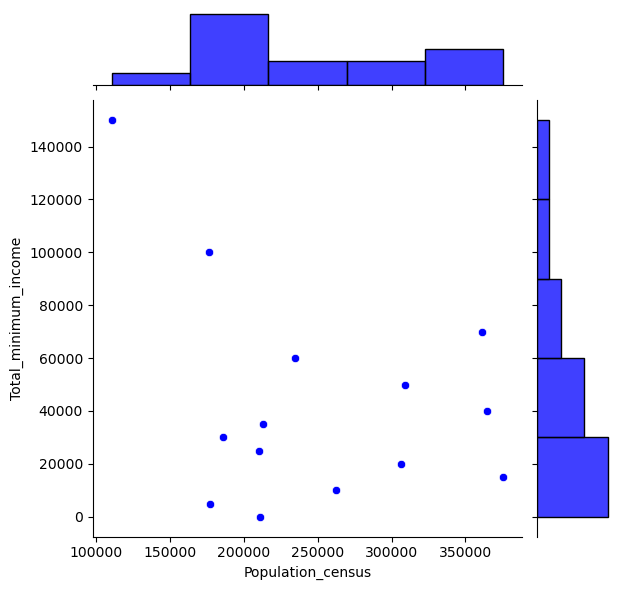

In [36]:
sns.jointplot(x='Population_census', y='Total_minimum_income', data=df, color='blue')

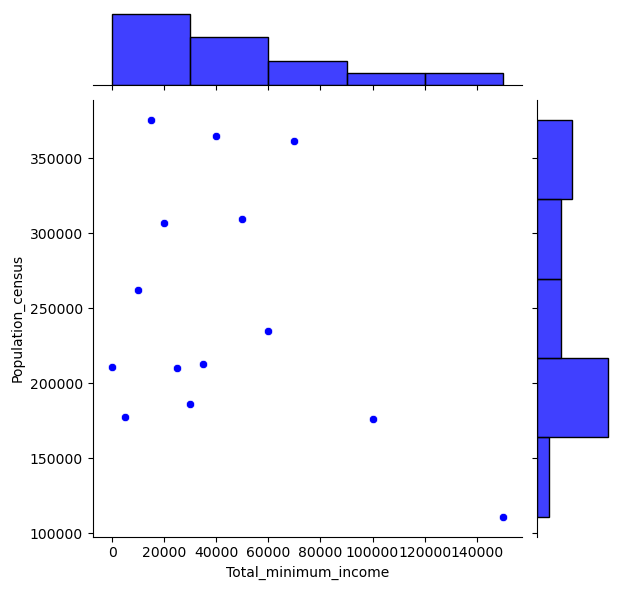

In [37]:
sns.jointplot(x='Total_minimum_income', y='Population_census', data=df, color='blue')

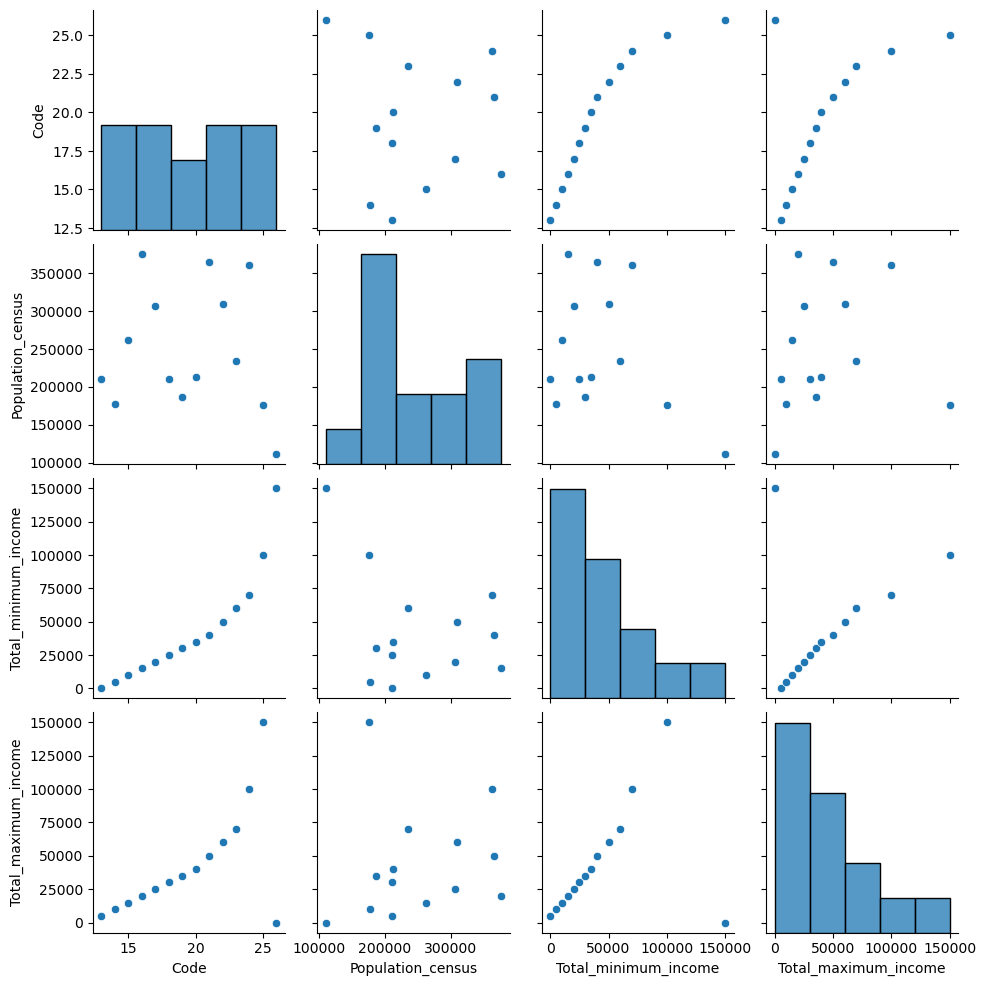

In [38]:
sns.pairplot(df)

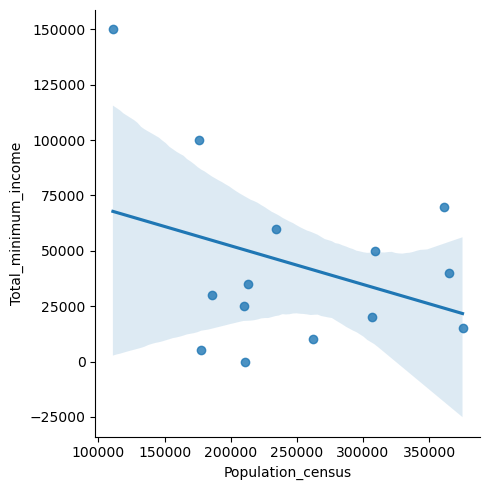

In [58]:
sns.lmplot(y='Total_minimum_income', x='Population_census', data=df)

### Divide Data into Training and Testing the model

In [40]:
X = df[['Population_census']]

In [41]:
X

Population_census
2              210705
3              177423
4              262197
5              375282
6              306639
7              210132
8              186087
9              212724
10             364719
11             309375
12             234606
13             361317
14             176310
15             110910

In [42]:
y = df[['Total_minimum_income']]

In [43]:
y

Total_minimum_income
2                      1
3                   5001
4                  10001
5                  15001
6                  20001
7                  25001
8                  30001
9                  35001
10                 40001
11                 50001
12                 60001
13                 70001
14                100001
15                150001

In [44]:
#80% for training model and 20% for testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

Population_census
14             176310
7              210132
10             364719
4              262197
3              177423
15             110910
6              306639
9              212724
12             234606
5              375282
8              186087

In [46]:
X_test

Population_census
11             309375
13             361317
2              210705

In [47]:
X_train.shape

(11, 1)

In [48]:
X_test.shape

(3, 1)

In [49]:
y_train.shape

(11, 1)

In [50]:
y_test.shape

(3, 1)

### Train the model

In [65]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
print('Linear Model Coefficient (m)',regressor.coef_)
print('Linear Model Coefficient (b)',regressor.intercept_)

Linear Model Coefficient (m) [[-0.29568543]]
Linear Model Coefficient (b) [114893.48705807]


### Test model

In [67]:
y_predict = regressor.predict(X_test)
y_predict

array([[23415.80567987],
       [ 8057.31282768],
       [52591.08752743]])

In [69]:
y_test

Total_minimum_income
11                 50001
13                 70001
2                      1

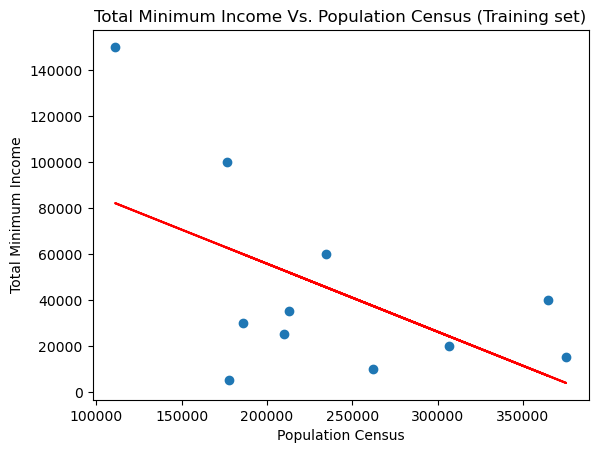

In [78]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Population Census')
plt.ylabel('Total Minimum Income')
plt.title('Total Minimum Income Vs. Population Census (Training set)')
plt.show()

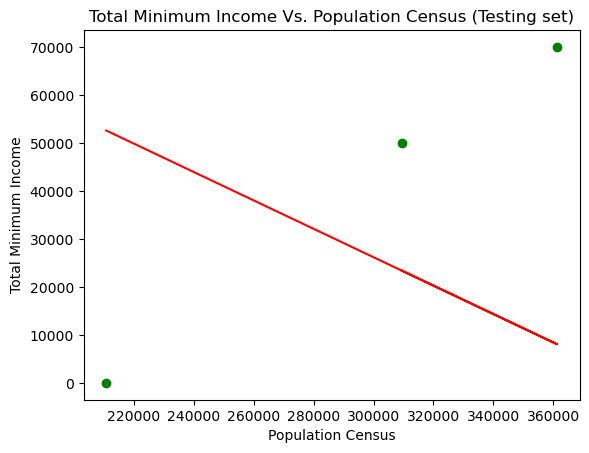

In [77]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, regressor.predict(X_test), color='red')
plt.xlabel('Population Census')
plt.ylabel('Total Minimum Income')
plt.title('Total Minimum Income Vs. Population Census (Testing set)')
plt.show()

### Divide Data into Training and Testing the model for population census and Code

In [89]:
X = df[['Code']]

In [90]:
X

Code
2     13
3     14
4     15
5     16
6     17
7     18
8     19
9     20
10    21
11    22
12    23
13    24
14    25
15    26

In [91]:
y = df[['Population_census']]

In [92]:
y

Population_census
2              210705
3              177423
4              262197
5              375282
6              306639
7              210132
8              186087
9              212724
10             364719
11             309375
12             234606
13             361317
14             176310
15             110910

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train

Code
14    25
7     18
10    21
4     15
3     14
15    26
6     17
9     20
12    23
5     16
8     19

In [95]:
X_test

Code
11    22
13    24
2     13

### Train the model

In [96]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [97]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[-8567.53608247]]
Linear Model Coefficient (b) [404589.24742268]


### Test model

In [98]:
y_predict = regressor.predict(X_test)
y_predict

array([[216103.45360825],
       [198968.3814433 ],
       [293211.27835052]])

In [99]:
y_test

Population_census
11             309375
13             361317
2              210705

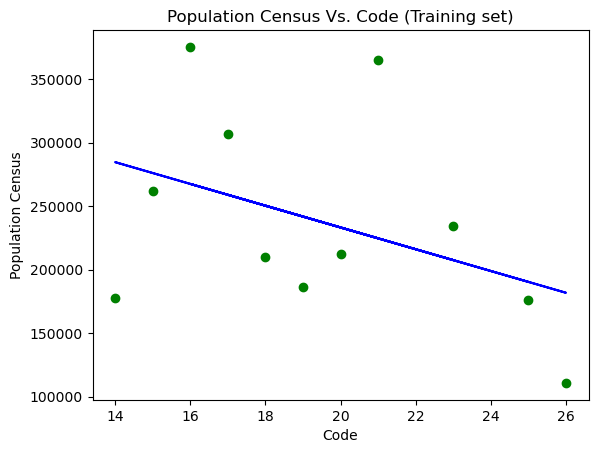

In [103]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Code')
plt.ylabel('Population Census')
plt.title('Population Census Vs. Code (Training set)')
plt.show()

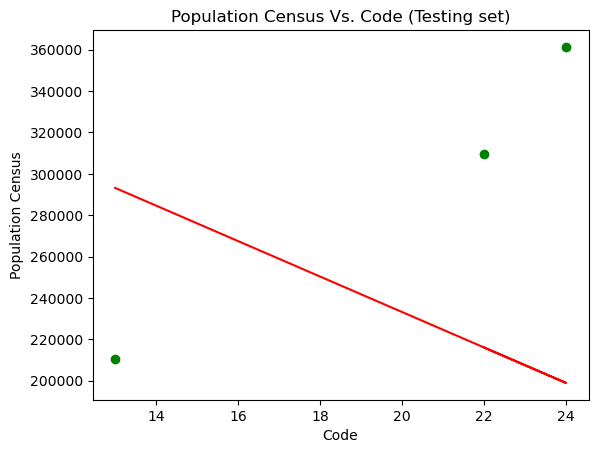

In [106]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, regressor.predict(X_test), color='red')
plt.xlabel('Code')
plt.ylabel('Population Census')
plt.title('Population Census Vs. Code (Testing set)')
plt.show()

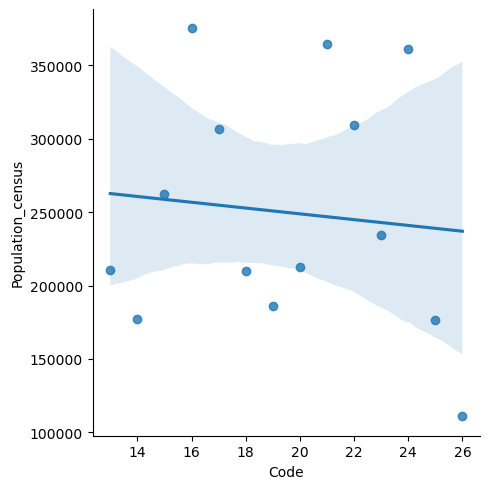

In [109]:
sns.lmplot(y='Population_census', x='Code', data=df)